<a href="https://colab.research.google.com/github/SaxenaVaishnavi/Machine-Learning-Techniques/blob/main/Week_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Week-3

**Note to Learners**:

- For questions that involve plotting, just enter $0$ as the answer in the portal.
- For numerical questions, there are two parts. The first part expects you to compute some quantity, say a parameter of a machine learning model. The second part will require you to convert this quantity (if it is not a scalar) into a scalar so that it can be entered as the answer on the portal to the corresponding NAT question.



## Dataset

Run the cell given below to generate the data-matrix $\mathbf{X}$, which is of shape $(n, d)$, where $n$ denotes the number of samples and $d$ denotes the number of features. You will be using this dataset for the rest of the assignment.

**Do not edit this cell.**

In the below cell, `np.random.randn(N//3, 2)` generates $\frac{2000}{3} ≈ 666$ points from a 2D standard normal distribution (mean = 0, standard deviation = 1). Adding `np.array([2, 2])`shifts this cluster to be centred around the point $(2,2)$.


In [2]:
np.random.seed(0)

N = 2000
data1 = np.random.randn(N//3,2) + np.array([2,2])
data2 = np.random.randn(N//3,2) + np.array([-3,-3])
data3 = np.random.randn(N//3,2) + np.array([-5,3])
X = np.concatenate((data1, data2, data3))

## Problem 1
How many samples are there in the dataset?



In [3]:
# Enter your solution here
X.shape[0]

1998

## Problem 2

How many features are there in the dataset?


In [4]:
# Enter your solution here
X.shape[1]

2

## Problem 3
Plot the dataset using matplotlib.



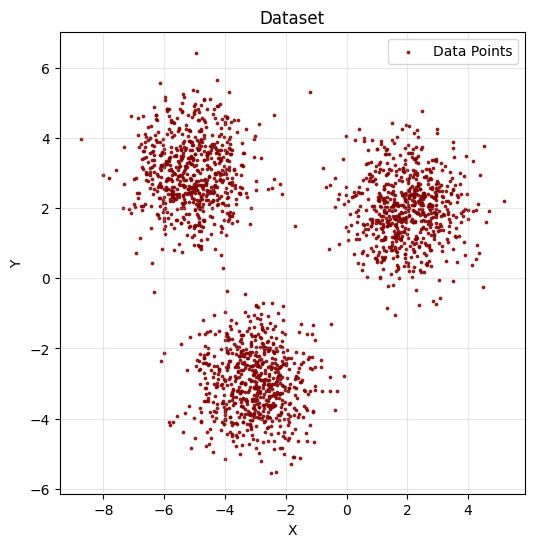

In [5]:
# Enter your solution here
plt.figure(figsize=(6,6))
plt.scatter(X[:, 0], X[:, 1], c='maroon', alpha=0.8, label="Data Points", s=3)

plt.title("Dataset")
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid(alpha=0.3)

plt.show()

## Instruction

Assume k = 3. Take the data points with indices 200, 800 and 1200 in X to be the initial cluster centres.


In [6]:
# Enter your code here
k = 3
initial_centres_idx = [200, 800, 1200]
cluster_centres = X[initial_centres_idx]

## Problem 4

Write a function `assign_clusters(X, k, cluster_centres)` that assigns a cluster to each data point as per their distance from each cluster centre and returns a vector `z`, where $z[i] \in \{0, 1, 2\}$.

What is the mean of the values in vector `z`? Provide the answer correct up to three decimal places.



In [7]:
# Enter your solution here
def assign_clusters(X, k, cluster_centres):
  n = X.shape[0]                    # no of data points
  z = np.zeros(n, dtype=int)        # a vector to store the cluster centre of each data point

  for idx, point in enumerate(X):
    distances = np.linalg.norm(X[idx] - cluster_centres, axis=1)
    z[idx] = np.argmin(distances)

  return z

z = assign_clusters(X, k, cluster_centres)
print(z)
print(z.mean())

[0 0 0 ... 1 1 1]
0.7107107107107107


## Problem 5

Plot the data points, with different color for different clusters.


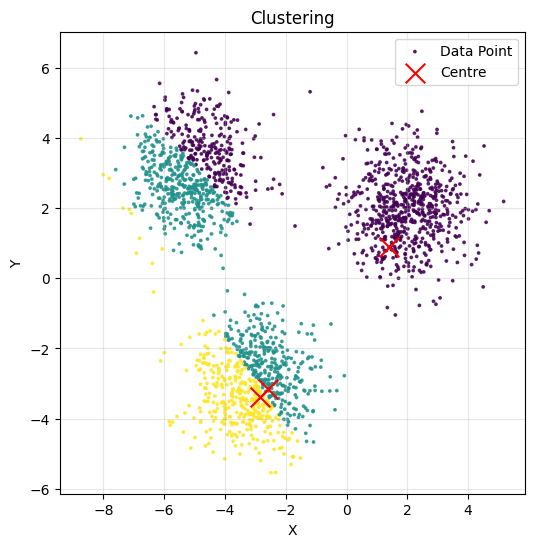

In [8]:
# Enter your solution here
def plot_clusters(X, cluster_centres):
  plt.figure(figsize=(6,6))

  plt.scatter(X[:, 0], X[:, 1], s=3, c=z, alpha=0.8, label='Data Point')
  plt.scatter(cluster_centres[:, 0], cluster_centres[:, 1], c='red', s=200, marker='x', label='Centre')

  plt.title('Clustering')
  plt.xlabel('X')
  plt.ylabel('Y')
  plt.legend()
  plt.grid(alpha=0.3)
  plt.show()

plot_clusters(X, cluster_centres)

## Problem 6
Write a function `compute_cluster_centres(X, z, k)` that computes the clusters' centres as per z and returns `k` new cluster centres.

What is the mean of the three cluster centres? Provide the $x_1$ and $y_1$ component. Provide both components correct up to three decimal places.



In [9]:
# Enter your solution here
def compute_cluster_centres(X, z, k):
  cluster_centres = []
  for cluster in range(k):
    cluster_points = X[z == cluster]
    cluster_centre = np.array(np.mean(cluster_points, axis=0))
    cluster_centres.append(cluster_centre)

  return cluster_centres

cluster_centres = compute_cluster_centres(X, z, k)
print(cluster_centres)
print(np.mean(cluster_centres, axis=0))

[array([0.15243752, 2.47002787]), array([-4.09339723,  0.26891354]), array([-3.71658966, -3.31569723])]
[-2.55251646 -0.19225194]


## Extra

Keep executing the code in problems 4, 5 and 6 (for, say, 10 iterations) to observe how the clusters change across different iterations.

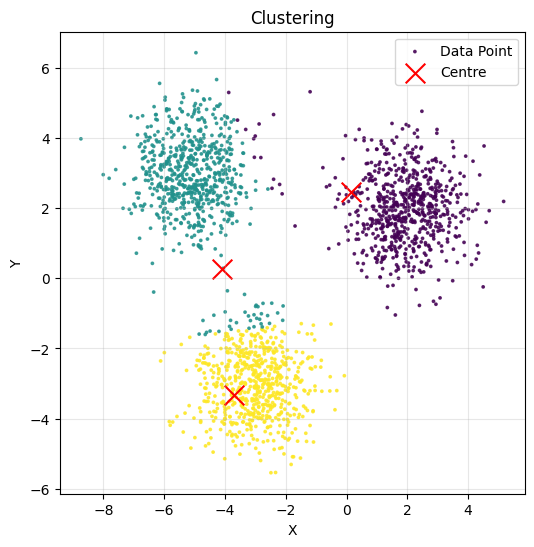

Iteration 1 - New Cluster Centres:
[array([1.88591789, 1.99823471]), array([-5.0462371 ,  2.78060108]), array([-3.02803683, -3.08797873])]


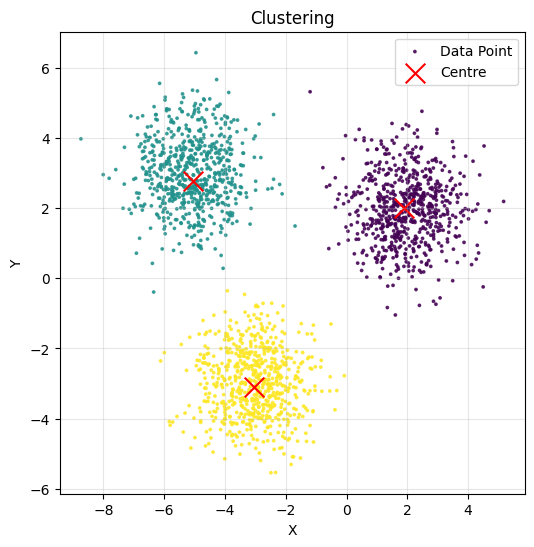

Iteration 2 - New Cluster Centres:
[array([1.98371416, 1.96524815]), array([-5.08786351,  3.00264163]), array([-3.04475663, -2.98468709])]


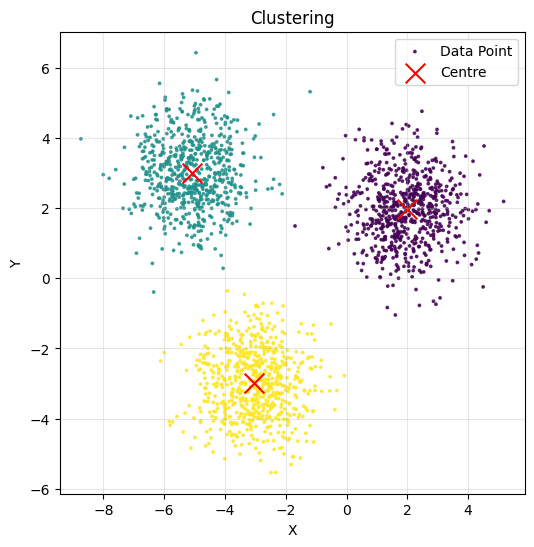

Iteration 3 - New Cluster Centres:
[array([1.9829719 , 1.95951297]), array([-5.08711902,  3.00839407]), array([-3.04475663, -2.98468709])]


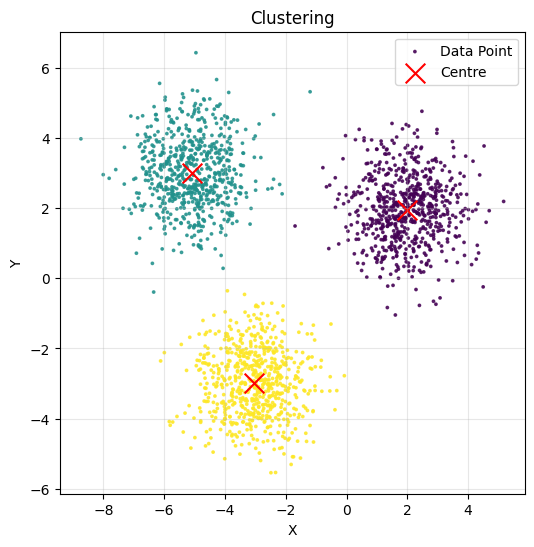

Iteration 4 - New Cluster Centres:
[array([1.9829719 , 1.95951297]), array([-5.08711902,  3.00839407]), array([-3.04475663, -2.98468709])]


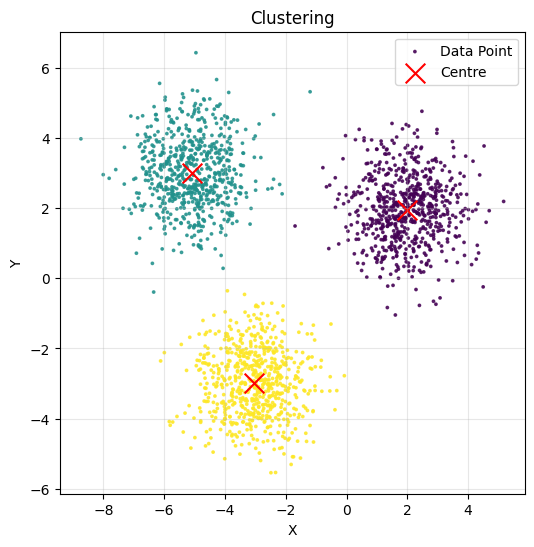

Iteration 5 - New Cluster Centres:
[array([1.9829719 , 1.95951297]), array([-5.08711902,  3.00839407]), array([-3.04475663, -2.98468709])]


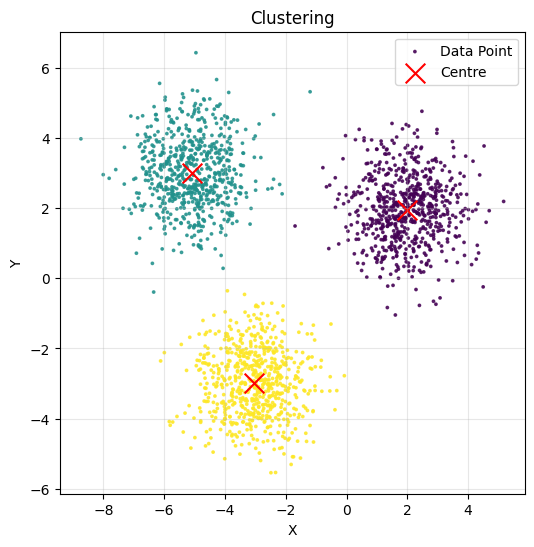

Iteration 6 - New Cluster Centres:
[array([1.9829719 , 1.95951297]), array([-5.08711902,  3.00839407]), array([-3.04475663, -2.98468709])]


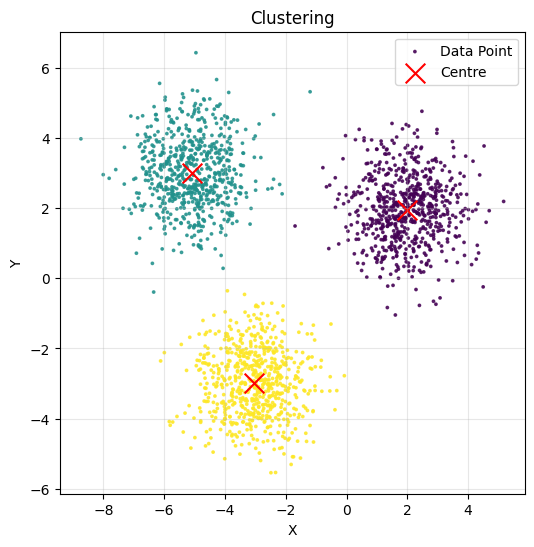

Iteration 7 - New Cluster Centres:
[array([1.9829719 , 1.95951297]), array([-5.08711902,  3.00839407]), array([-3.04475663, -2.98468709])]


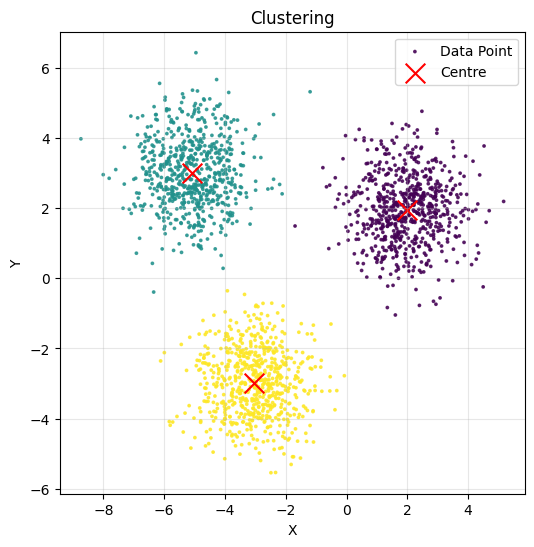

Iteration 8 - New Cluster Centres:
[array([1.9829719 , 1.95951297]), array([-5.08711902,  3.00839407]), array([-3.04475663, -2.98468709])]


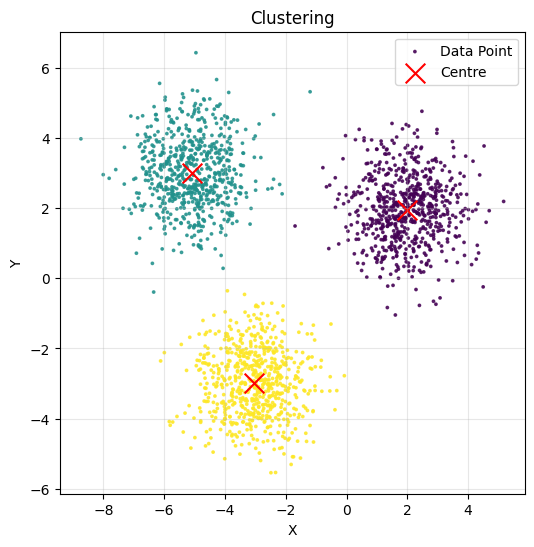

Iteration 9 - New Cluster Centres:
[array([1.9829719 , 1.95951297]), array([-5.08711902,  3.00839407]), array([-3.04475663, -2.98468709])]


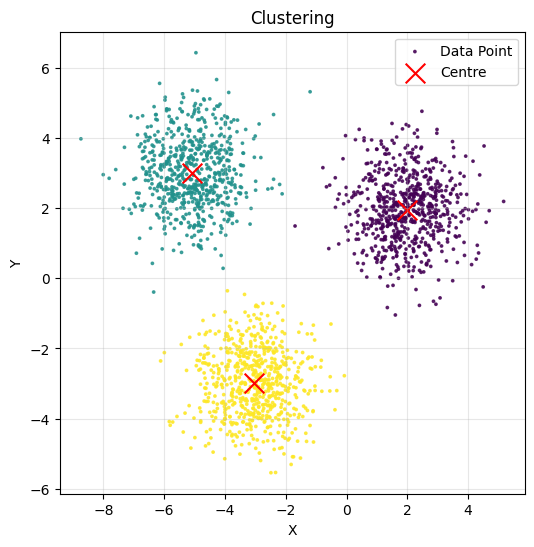

Iteration 10 - New Cluster Centres:
[array([1.9829719 , 1.95951297]), array([-5.08711902,  3.00839407]), array([-3.04475663, -2.98468709])]


In [10]:
# Enter your code here
for iteration in range(10):
    z = assign_clusters(X, k, cluster_centres)
    plot_clusters(X, np.array(cluster_centres))
    cluster_centres = compute_cluster_centres(X, z, k)

    print(f"Iteration {iteration+1} - New Cluster Centres:")
    print(cluster_centres)